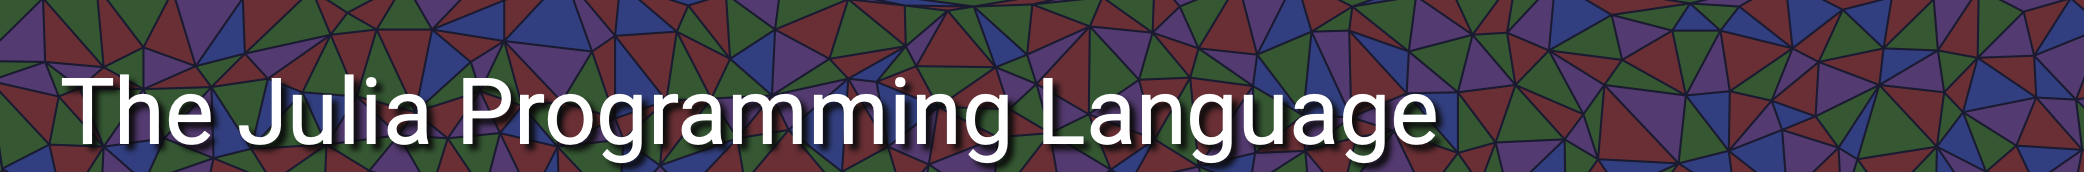

### 1. Why Julia?

- Julia language is a compiled programming language released in 2012!
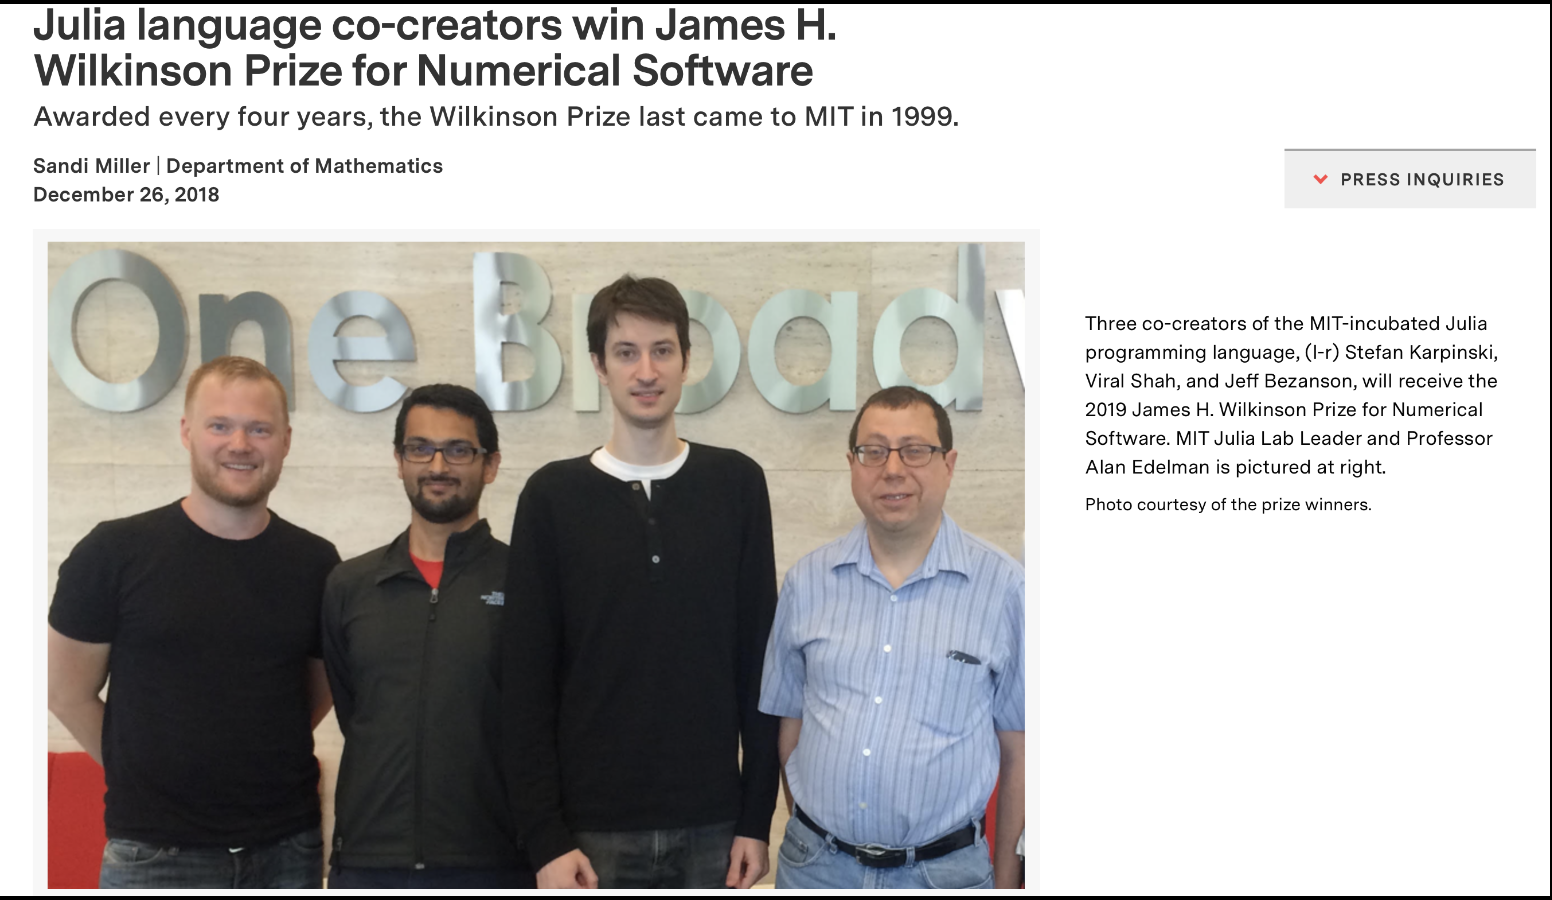

`Julia` is known for its speed, ease of use, and strong support for scientific computing. Let's break it down with examples.
- Speed 
- Multiple dispatch
- Dynamic type system
- Metaprogramming
- Built-in package manager
- Built-in test
- Built-in documentation
- Built-in parallelism
- Built-in distributed computing
- Built-in GPU support
- Built-in multithreading

#### 1.1 `Julia`'s Speed and Performance

`Julia` compiles code just-in-time (`JIT`) using `LLVM`, which allows it to achieve speeds similar to low-level languages like `C`.

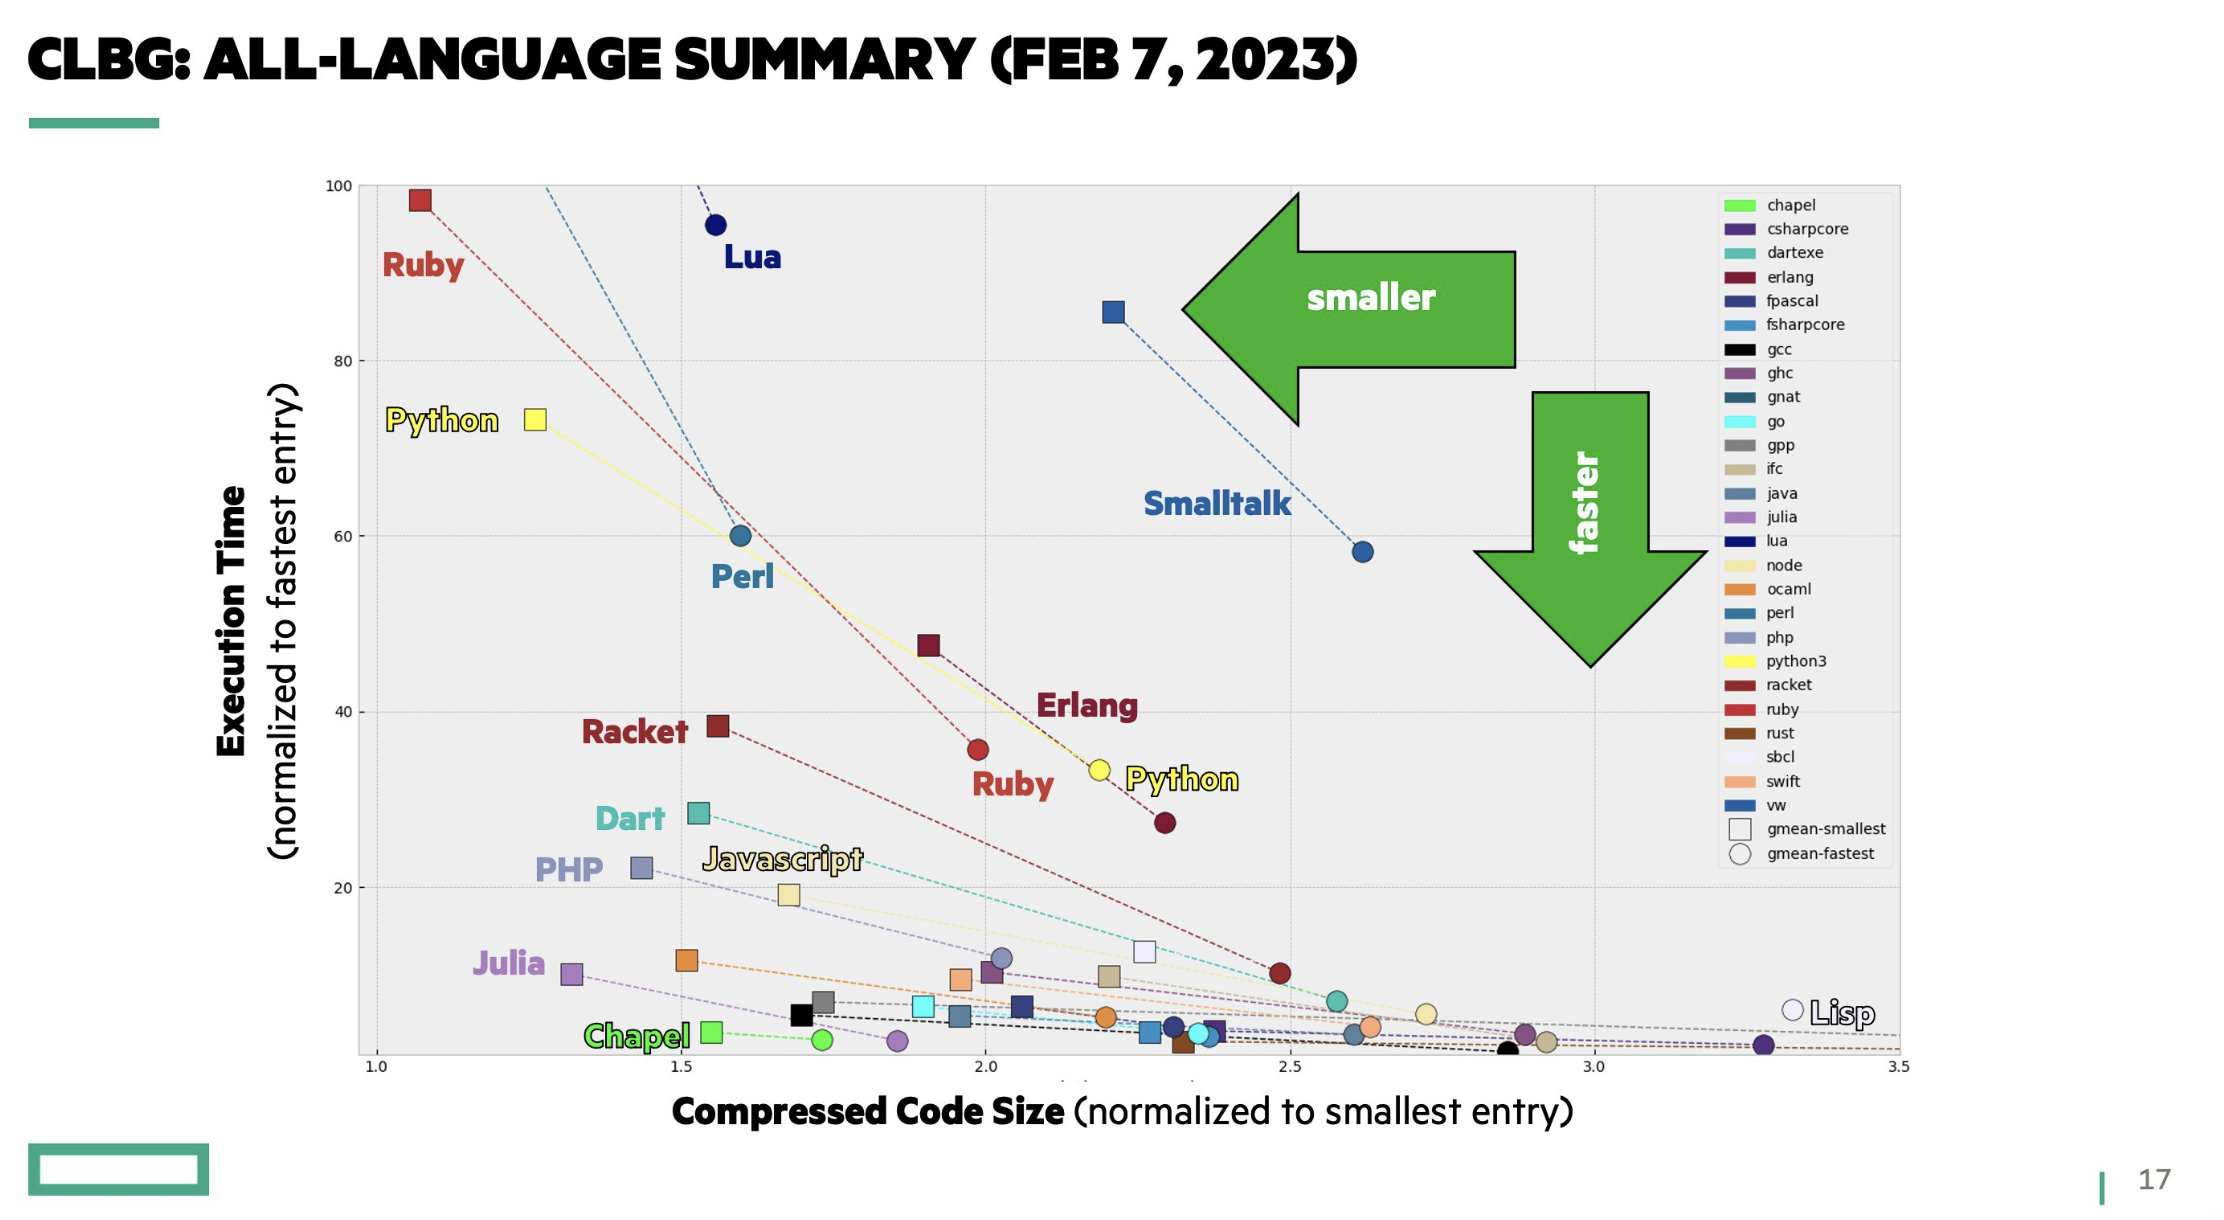

> **Reference**: [Why Julia? A manifesto](https://github.com/Datseris/whyjulia-manifesto/tree/main)

Julia has a just-in-time (JIT) compilation. This means that the code is dynamically compiled during the execution of the program, also known as the program run time. In this way the previous step of compiling the code into an executable is completely excluded from consideration.

The idea behind JIT compilation is to bring the benefits of both (static) compilation and interpretation.

> **Reference**: [The Julia Compilation Process](https://testsubjector.github.io/blog/2020/03/26/The-Julia-Compilation-Process)

Julia is fast because of its design decisions. The core design decision, **type-stability through specialization via multiple-dispatch** is what allows Julia to be very easy for a compiler to make into efficient code, but also allow the code to be very concise and "look like a scripting language". 

##### **Type-stability and Code Introspection (at a glance...)**

> **Type stability**: the reasonable type to output from `*(::Float64,::Float64)` is a `Float64`

In [28]:
a₁ = 3
b₁ = 2
c₁ = a * b

typeof(a₁), typeof(b₁), typeof(c₁)

(Int64, Int64, Float64)

In [21]:
@code_llvm a₁ * b₁

; Function Signature: *(Int64, Int64)
;  @ int.jl:88 within `*`
define i64 @"julia_*_15663"(i64 signext %"x::Int64", i64 signext %"y::Int64") #0 {
top:
  %0 = mul i64 %"y::Int64", %"x::Int64"
  ret i64 %0
}


In [36]:
@code_native a₁ * b₁

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 15, 0
	.globl	"_julia_*_15946"                ; -- Begin function julia_*_15946
	.p2align	2
"_julia_*_15946":                       ; @"julia_*_15946"
; Function Signature: *(Int64, Int64)
; ┌ @ int.jl:88 within `*`
; %bb.0:                                ; %top
; │ @ int.jl within `*`
	;DEBUG_VALUE: *:x <- $x0
	;DEBUG_VALUE: *:x <- $x0
	;DEBUG_VALUE: *:y <- $x1
	;DEBUG_VALUE: *:y <- $x1
; │ @ int.jl:88 within `*`
	mul	x0, x1, x0
	ret
; └
                                        ; -- End function
.subsections_via_symbols


In [29]:
a₂ = 3.0
b₂ = 2.0
c₂ = a₂ * b₂

typeof(a₂), typeof(b₂), typeof(c₂)

(Float64, Float64, Float64)

In [30]:
@code_llvm a₂ * b₂

; Function Signature: *(Float64, Float64)
;  @ float.jl:480 within `*`
define double @"julia_*_15680"(double %"x::Float64", double %"y::Float64") #0 {
top:
  %0 = fmul double %"x::Float64", %"y::Float64"
  ret double %0
}


In [34]:
@code_native a₂ * b₂

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 15, 0
	.globl	"_julia_*_15937"                ; -- Begin function julia_*_15937
	.p2align	2
"_julia_*_15937":                       ; @"julia_*_15937"
; Function Signature: *(Float64, Float64)
; ┌ @ float.jl:480 within `*`
; %bb.0:                                ; %top
; │ @ float.jl within `*`
	;DEBUG_VALUE: *:x <- $d0
	;DEBUG_VALUE: *:x <- $d0
	;DEBUG_VALUE: *:y <- $d1
	;DEBUG_VALUE: *:y <- $d1
; │ @ float.jl:480 within `*`
	fmul	d0, d0, d1
	ret
; └
                                        ; -- End function
	.section	__DATA,__const
	.p2align	3, 0x0                          ; @"+Core.Float64#15939"
"l_+Core.Float64#15939":
	.quad	"l_+Core.Float64#15939.jit"

.set "l_+Core.Float64#15939.jit", 4783132960
.subsections_via_symbols


In [31]:
a₃ = 3
b₃ = 2.0
c₃ = a + b

typeof(a₃), typeof(b₃), typeof(c₃)

(Int64, Float64, Float64)

In [35]:
@code_llvm a₃ * b₃

; Function Signature: *(Int64, Float64)
;  @ promotion.jl:426 within `*`
define double @"julia_*_15941"(i64 signext %"x::Int64", double %"y::Float64") #0 {
top:
; ┌ @ promotion.jl:396 within `promote`
; │┌ @ promotion.jl:373 within `_promote`
; ││┌ @ number.jl:7 within `convert`
; │││┌ @ float.jl:239 within `Float64`
      %0 = sitofp i64 %"x::Int64" to double
; └└└└
;  @ promotion.jl:426 within `*` @ float.jl:480
  %1 = fmul double %0, %"y::Float64"
  ret double %1
}


In [33]:
@code_native a₃ * b₃

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 15, 0
	.globl	"_julia_*_15932"                ; -- Begin function julia_*_15932
	.p2align	2
"_julia_*_15932":                       ; @"julia_*_15932"
; Function Signature: *(Int64, Float64)
; ┌ @ promotion.jl:426 within `*`
; %bb.0:                                ; %top
; │ @ promotion.jl within `*`
	;DEBUG_VALUE: *:x <- $x0
	;DEBUG_VALUE: *:x <- $x0
	;DEBUG_VALUE: *:y <- $d0
	;DEBUG_VALUE: *:y <- $d0
; │ @ promotion.jl:426 within `*`
; │┌ @ promotion.jl:396 within `promote`
; ││┌ @ promotion.jl:373 within `_promote`
; │││┌ @ number.jl:7 within `convert`
; ││││┌ @ float.jl:239 within `Float64`
	scvtf	d1, x0
; │└└└└
; │ @ promotion.jl:426 within `*` @ float.jl:480
	fmul	d0, d1, d0
	ret
; └
                                        ; -- End function
	.section	__DATA,__const
	.p2align	3, 0x0                          ; @"+Core.Float64#15934"
"l_+Core.Float64#15934":
	.quad	"l_+Core.Float64#15934.jit"

.set "l_+Core.Flo

> **Type hierarchy**: Abstract types cannot be instantiated, and serve only as nodes in the type graph, thereby describing sets of related concrete types: those concrete types which are their descendants. We begin with abstract types even though they have no instantiation because they are the backbone of the type system: they form the conceptual hierarchy which makes Julia's type system more than just a collection of object implementations.

In [27]:
abstract type Number end
abstract type Real          <: Number end
abstract type AbstractFloat <: Real end
abstract type Integer       <: Real end
abstract type Signed        <: Integer end
abstract type Unsigned      <: Integer end

In [45]:
Integer <: Number

true

In [38]:
Integer <: Number

true

In [37]:
Integer <: AbstractFloat

false

> **Primitive Types**: Unlike most languages, Julia lets you declare your own primitive types, rather than providing only a fixed set of built-in ones. 

```
primitive type Float16 <: AbstractFloat 16 end
primitive type Float32 <: AbstractFloat 32 end
primitive type Float64 <: AbstractFloat 64 end

primitive type Bool <: Integer 8 end
primitive type Char <: AbstractChar 32 end

primitive type Int8    <: Signed   8 end
primitive type UInt8   <: Unsigned 8 end
primitive type Int16   <: Signed   16 end
primitive type UInt16  <: Unsigned 16 end
primitive type Int32   <: Signed   32 end
primitive type UInt32  <: Unsigned 32 end
primitive type Int64   <: Signed   64 end
primitive type UInt64  <: Unsigned 64 end
primitive type Int128  <: Signed   128 end
primitive type UInt128 <: Unsigned 128 end
```     

> **Composite Types**: A composite type is a collection of named fields, an instance of which can be treated as a single value. In many languages, composite types are the only kind of user-definable type, and they are by far the most commonly used user-defined type in Julia as well.

In [54]:
@doc subtypes

```
subtypes(T::DataType)
```

Return a list of immediate subtypes of DataType `T`. Note that all currently loaded subtypes are included, including those not visible in the current module.

See also [`supertype`](@ref), [`supertypes`](@ref), [`methodswith`](@ref).

# Examples

```jldoctest
julia> subtypes(Integer)
3-element Vector{Any}:
 Bool
 Signed
 Unsigned
```


In Julia, all values are objects, but functions are not bundled with the objects they operate on. This is necessary since Julia chooses which method of a function to use by multiple dispatch, meaning that the types of all of a function's arguments are considered when selecting a method, rather than just the first one

> More information on [Julia's Type System](https://docs.julialang.org/en/v1/manual/types/)

### 2. Multiple Dispatch in Julia

One of the most powerful features of `Julia` is multiple dispatch, where functions are chosen based on the types of all arguments, making Julia highly flexible and extensible.

#### 2.1 Example of Multiple Dispatch
Let’s define a simple function that behaves differently based on the types of its arguments.

In [5]:
# Define functions using multiple dispatch
function add(a::Int, b::Int)
    return a + b
end

function add(a::String, b::String)
    return a * b # Concatenates strings
end

# Test multiple dispatch
println(add(3, 4))       # Int addition
println(add("Hello, ", "World!"))  # String concatenation

7
Hello, World!


Here, `Julia` selects the appropriate function to run based on the type of the inputs, whether it's integers or strings.

#### 2.2 Performance Benefits of Multiple Dispatch

In `Julia`, multiple dispatch allows highly optimized code paths to be selected at runtime, providing both flexibility and performance.

In [6]:
# Example of more complex dispatch based on argument types
function process_data(x::Array{Int})
    println("Processing integer array")
end

function process_data(x::Array{Float64})
    println("Processing float array")
end

# Test with different types
process_data([1, 2, 3])         # Dispatches to integer array method
process_data([1.1, 2.2, 3.3])   # Dispatches to float array method

Processing integer array
Processing float array


#### 2.3 Custom Interfaces with Multiple Dispatch

We can also use multiple dispatch to define custom interfaces by implementing functions for specific types.

In [7]:
# Define an abstract type and a concrete subtype
abstract type Shape end
struct Circle <: Shape
    radius::Float64
end

struct Square <: Shape
    side::Float64
end

# Define a generic area function using dispatch
area(s::Circle) = π * s.radius^2
area(s::Square) = s.side^2

# Test the area function
println(area(Circle(5.0)))  # Circle with radius 5
println(area(Square(4.0)))  # Square with side 4

78.53981633974483
16.0


In [48]:
area_squared(s::Shape) = area(s)^2
area_squared(Circle(5.0))
# area_squared(Square(47.0))

6168.502750680849

In [49]:
area.([Circle(5.0), Square(3.0)])

2-element Vector{Float64}:
 78.53981633974483
  9.0